# Mandril
The mandril algorithm is a merging of maxent and maml.

### Imports

In [1]:
import utils
from agent import Agent
import solver as Solver
from maml import maml
from maml import maml_iteration

import numpy as np
import matplotlib.pyplot as plt
import time

### Moving average

In [2]:
def moving_average(x, w=10):
    return np.convolve(x, np.ones(w), 'valid') / w

### Parameters

In [3]:
size = 6
p_slip = 0.0
N = 200
validateStep = 10
batch_size = 10
meta_lr = 0.1
terminal = None

### Run Mandril

In [3]:
startTime = time.time()
data_20_meta = maml(N, batch_size, meta_lr, size, p_slip)
executionTime = (time.time() - startTime)

KeyboardInterrupt: 

In [ ]:
print('Theta: {0}'.format(data_20_meta["thetas"][-1]))
print("mean validations per tenths:")
print([np.round(np.mean(data_20_meta["policy_score"][int(N / 10) * i :
    int(N / 10) * (i + 1)]), 2) for i in range(10)])
print("Regular maxent:")
print([np.round(np.mean(data_20_meta["reg_policy_score"][int(N / 10) * i :
    int(N / 10) * (i + 1)]), 2) for i in range(10)])
print('Total execution time: {0} (sec)'.format(executionTime))

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(N), data_20_meta["policy_score"], data_20_meta["reg_policy_score"])
plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for batch size of: {0}".format(batch_size))
plt.show()

# show iteration:
maml_iteration(
    batch_size,
    data_20_meta["thetas"][-1],
    meta_lr,
    size,
    p_slip,
    terminal,
    draw=True
)
plt.show()

In [ ]:
startTime = time.time()
old_batch_size = batch_size
batch_size = 5
data_5_meta = maml(N, batch_size, meta_lr, size, p_slip)
fig = plt.figure(figsize=(12,8))
plt.plot(range(N), data_5_meta["policy_score"], data_5_meta["reg_policy_score"])
plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for batch size of: {0}".format(batch_size))
plt.show()

# fig = plt.figure(figsize=(12,8))
# plt.plot(range(N), data_5_meta["validation_score"], data_5_meta["regular_score"])
# plt.legend(["validation_score", "regular_score"])
# plt.title("Policy for mandril reward, vs. policy for regular maxent reward for batch size of: {0}".format(batch_size))
# plt.show()

maml_iteration(
    batch_size,
    data_5_meta["thetas"][-1],
    meta_lr,
    size,
    p_slip,
    terminal,
    draw=True
)
plt.show()

batch_size = old_batch_size

In [ ]:
old_terminal = terminal
terminal = size**2 - 1
old_batch_size = batch_size
batch_size = 5
data_const_terminal = maml(N, batch_size, meta_lr, size, p_slip)
fig = plt.figure(figsize=(12,8))
plt.plot(range(N), data_const_terminal["policy_score"], data_const_terminal["reg_policy_score"])
plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for batch size of: {0}".format(batch_size))
plt.show()

maml_iteration(
    batch_size,
    data_const_terminal["thetas"][-1],
    meta_lr,
    size,
    p_slip,
    terminal,
    draw=True
)
plt.show()

terminal = old_terminal
batch_size = old_batch_size

### Plot the different options

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(211)
ax.plot(range(N), data_20_meta["policy_score"], data_20_meta["reg_policy_score"])
ax.legend(["policy_score", "reg_policy_score"])
ax.set_title("Policy for mandril reward, vs. policy for regular maxent reward for changing terminal state")

ax = fig.add_subplot(212)
ax.plot(range(N), data_const_terminal["policy_score"], data_const_terminal["reg_policy_score"])
ax.set_title("Policy for mandril reward, vs. policy for regular maxent reward for constant terminal state")
plt.show()

## Add slippage

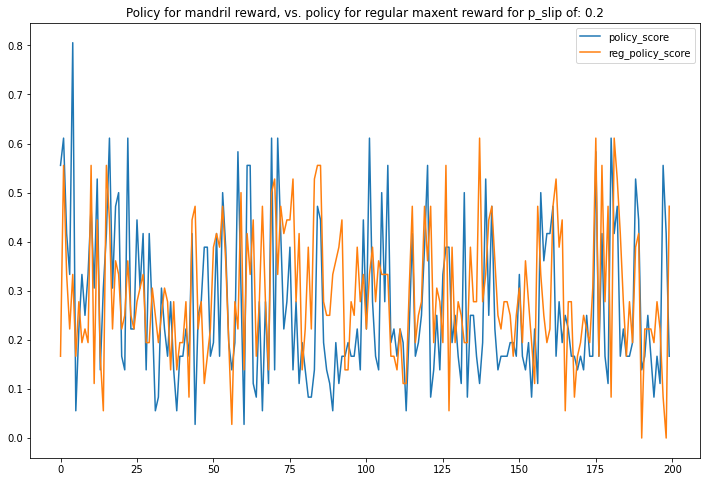

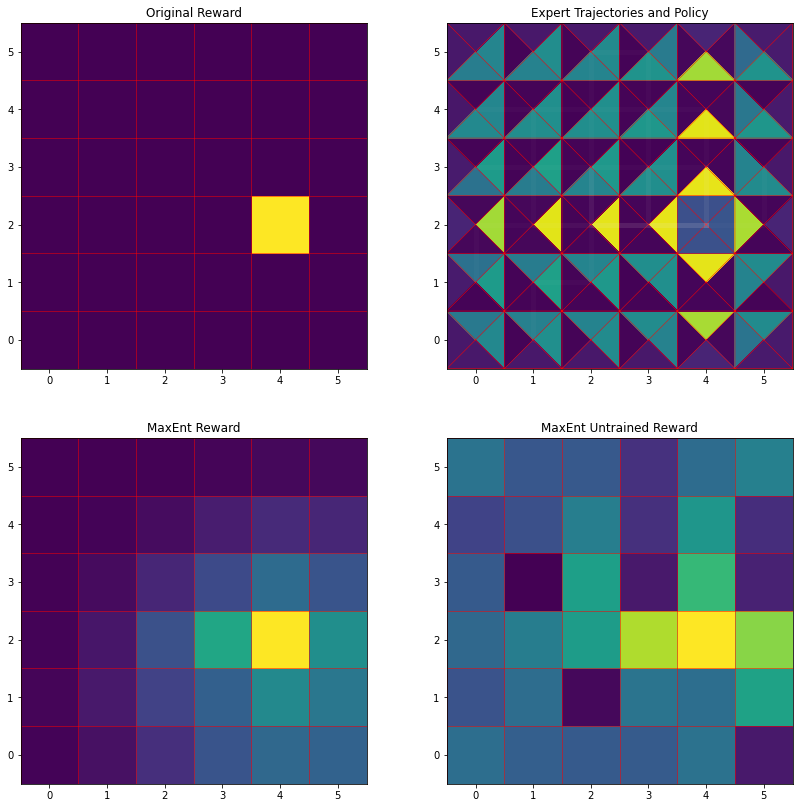

In [7]:
p_slip = 0.2
data_02_slip, valid_data_02_slip = maml(N, batch_size, meta_lr, size, p_slip)
fig = plt.figure(figsize=(12,8))
plt.plot(range(N), data_02_slip["policy_score"], data_02_slip["reg_policy_score"])
plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for p_slip of: {0}".format(p_slip))
plt.show()

maml_iteration(
    batch_size,
    data_02_slip["thetas"][-1],
    meta_lr,
    size,
    p_slip,
    terminal,
    draw=True,
)
plt.show()

p_slip = 0.0

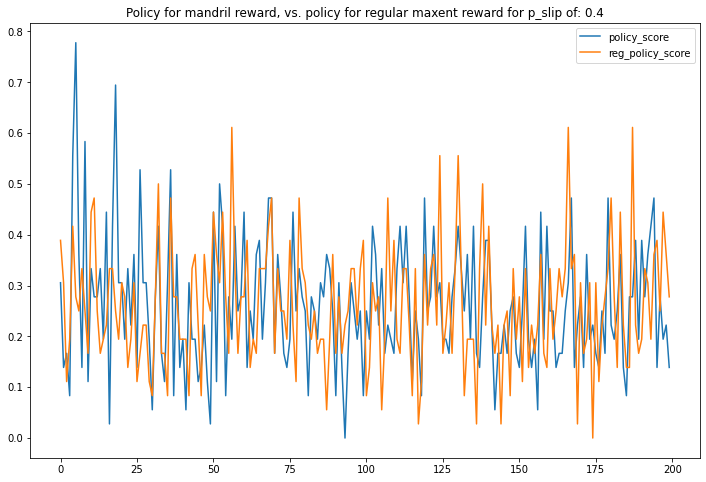

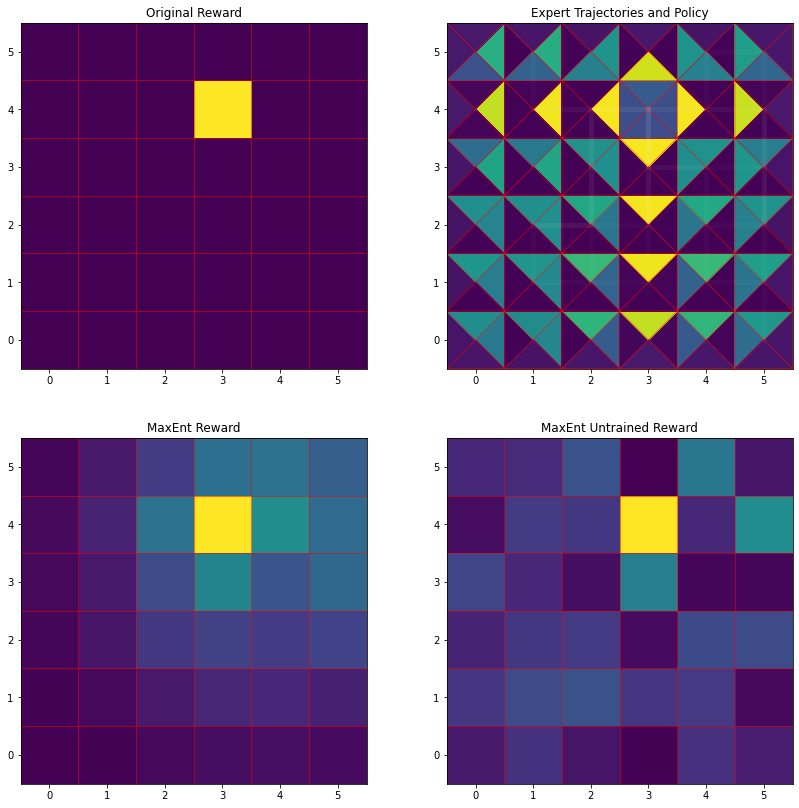

In [9]:
p_slip = 0.4
data_04_slip, valid_data_04_slip = maml(N, batch_size, meta_lr, size, p_slip)
fig = plt.figure(figsize=(12,8))
plt.plot(range(N), data_04_slip["policy_score"], data_04_slip["reg_policy_score"])
plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for p_slip of: {0}".format(p_slip))
plt.show()

maml_iteration(
    batch_size,
    data_04_slip["thetas"][-1],
    meta_lr,
    size,
    p_slip,
    terminal,
    draw=True,
)
plt.show()

p_slip = 0.0

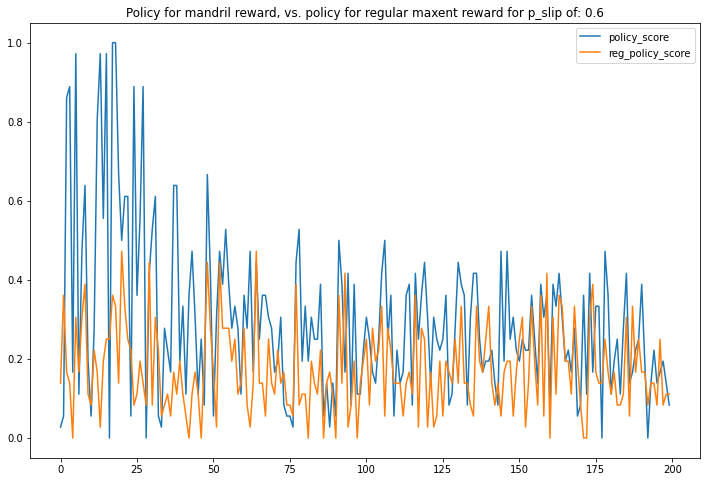

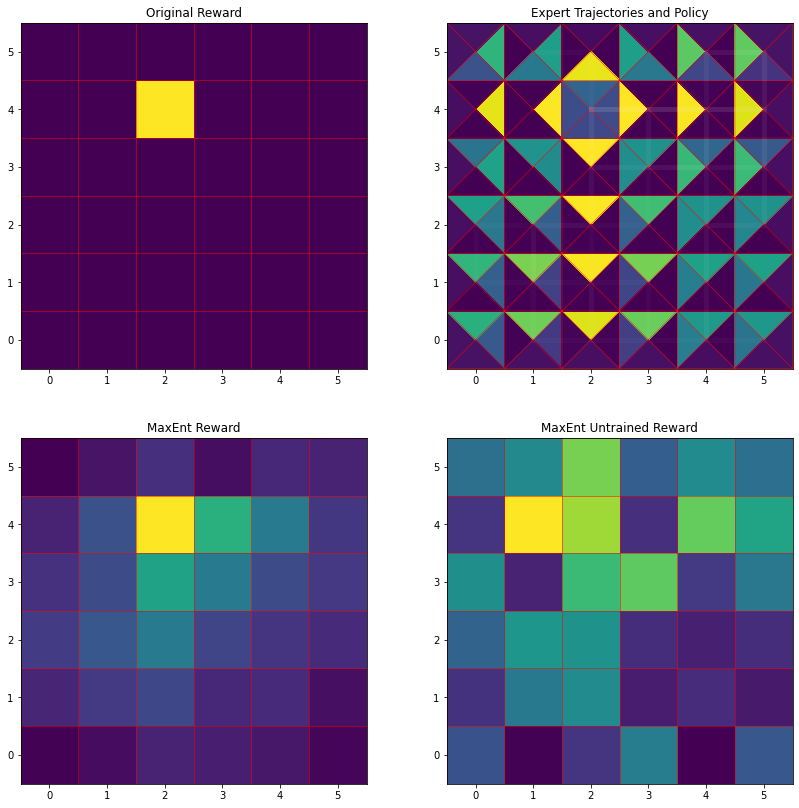

In [10]:
p_slip = 0.6
data_06_slip, valid_data_06_slip = maml(N, batch_size, meta_lr, size, p_slip)
fig = plt.figure(figsize=(12,8))
plt.plot(range(N), data_06_slip["policy_score"], data_06_slip["reg_policy_score"])
plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for p_slip of: {0}".format(p_slip))
plt.show()

maml_iteration(
    batch_size,
    data_06_slip["thetas"][-1],
    meta_lr,
    size,
    p_slip,
    terminal,
    draw=True,
)
plt.show()

p_slip = 0.0

### Use moving averages:

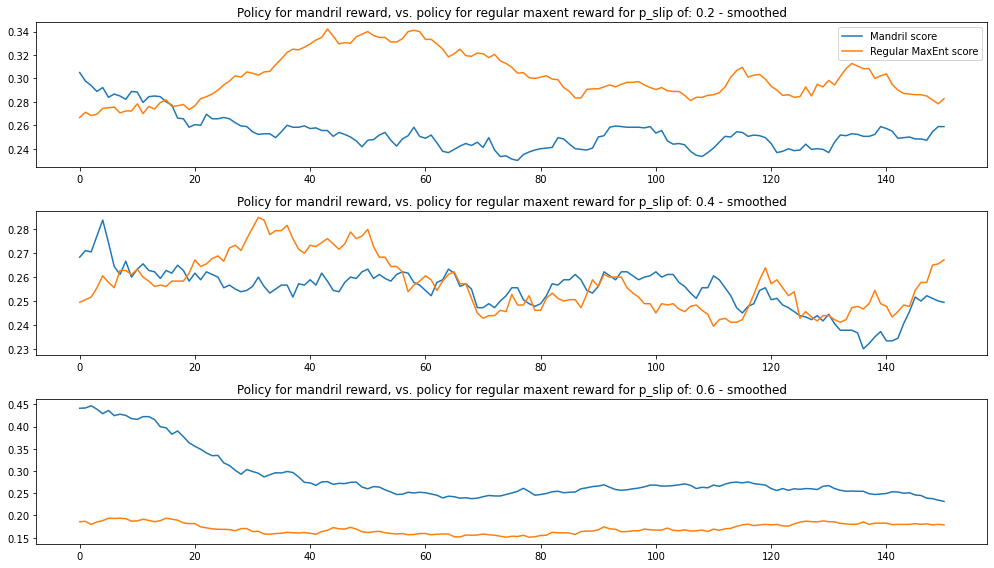

In [11]:
w = 50

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(311)
plt.plot(range(N+1-w), moving_average(data_02_slip["policy_score"],w), moving_average(data_02_slip["reg_policy_score"],w))
plt.legend(["Mandril score", "Regular MaxEnt score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for p_slip of: {0} - smoothed".format(0.2))
# plt.show()

ax = fig.add_subplot(312)
plt.plot(range(N+1-w), moving_average(data_04_slip["policy_score"],w), moving_average(data_04_slip["reg_policy_score"],w))
# plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for p_slip of: {0} - smoothed".format(0.4))
# plt.show()

ax = fig.add_subplot(313)
plt.plot(range(N+1-w), moving_average(data_06_slip["policy_score"],w), moving_average(data_06_slip["reg_policy_score"],w))
# plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for p_slip of: {0} - smoothed".format(0.6))

fig.tight_layout()
plt.show()

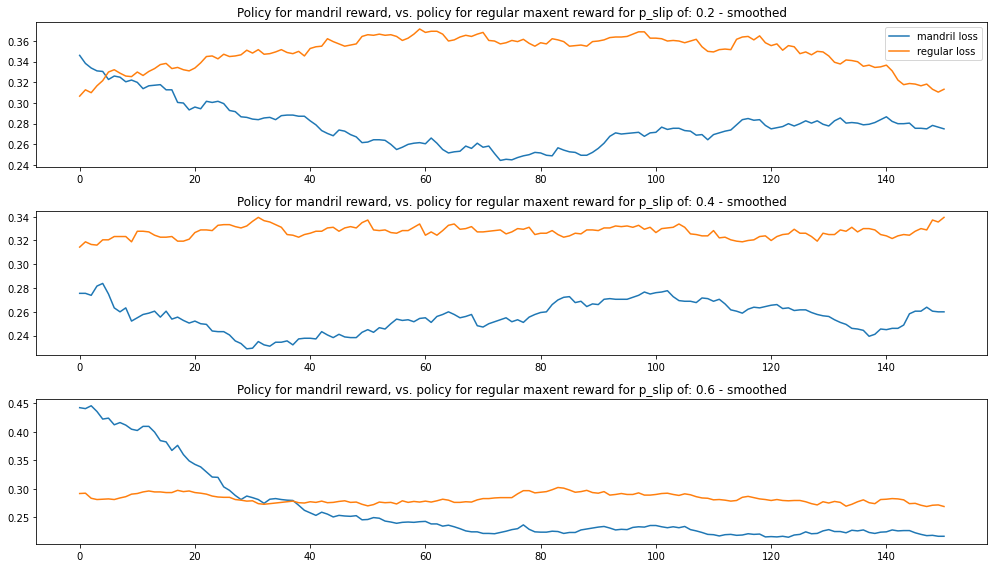

In [13]:
w = 50

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(311)
plt.plot(range(N+1-w), moving_average(data_02_slip["phi_loss"],w), moving_average(data_02_slip["reg_loss"],w))
plt.legend(["mandril loss", "regular loss"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for p_slip of: {0} - smoothed".format(0.2))
# plt.show()

ax = fig.add_subplot(312)
plt.plot(range(N+1-w), moving_average(data_04_slip["phi_loss"],w), moving_average(data_04_slip["reg_loss"],w))
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for p_slip of: {0} - smoothed".format(0.4))
# plt.show()

ax = fig.add_subplot(313)
plt.plot(range(N+1-w), moving_average(data_06_slip["phi_loss"],w), moving_average(data_06_slip["reg_loss"],w))
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for p_slip of: {0} - smoothed".format(0.6))

fig.tight_layout()
plt.show()

### Thetas

In [35]:
fig = plt.figure(figsize=(12,8))
plt.plot(range(N), data_04_slip["policy_score"], data_04_slip["reg_policy_score"])
plt.legend(["policy_score", "reg_policy_score"])
plt.title("Policy for mandril reward, vs. policy for regular maxent reward for p_slip of: {0}".format(p_slip))
plt.show()

maml_iteration(
    batch_size,
    data_04_slip["thetas"][-1],
    meta_lr,
    size,
    p_slip,
    terminal,
    draw=True
)
plt.show()

[array([0.23497727, 0.29435075, 0.3472055 , 0.38564723, 0.40334437,
        0.39723174, 0.28340988, 0.35502119, 0.41877017, 0.46513535,
        0.48648016, 0.47910762, 0.34083325, 0.42695416, 0.50361969,
        0.55937921, 0.58504881, 0.57618248, 0.40870199, 0.51197181,
        0.60390344, 0.67076613, 0.70154721, 0.69091536, 0.48866292,
        0.61213707, 0.72205476, 0.80199887, 0.83880215, 0.82609022,
        0.58257233, 0.72977528, 0.86081654, 0.956124  , 1.        ,
        0.98484513]),
 array([0.23253278, 0.29170646, 0.34436418, 0.38256034, 0.39993735,
        0.39345406, 0.28117941, 0.35273244, 0.41640633, 0.46259325,
        0.48360559, 0.47576597, 0.33887068, 0.42510467, 0.50184291,
        0.55750629, 0.58282985, 0.57338174, 0.40703861, 0.5106196 ,
        0.60279467, 0.6696554 , 0.70007311, 0.68872439, 0.48729095,
        0.61129412, 0.72164256, 0.80168565, 0.83810056, 0.82451431,
        0.581423  , 0.7293804 , 0.86104532, 0.95655067, 1.        ,
        0.98378924]),
 arr

## Train maxEnt on the same number of trajectories, but all at once:

In [ ]:
theta, reward, maml_reward, reg_reward, world = maml_iteration(
    batch_size=N*batch_size,
    theta=None,
    meta_lr=meta_lr,
    size=size,
    p_slip=p_slip,
    terminal=terminal,
    discount=0.7,
    draw=True
)